# Linear Regression - Gradient Descent

Linear Regression is a method used to define a relationship between a dependent variable $(Y)$ and independent variable $(X)$.

 Which is simply written as :

<center><img src="https://miro.medium.com/max/722/1*nejpuvlh1MbMGQtve_1ztQ.png"></center>

Where $y$ is the dependent variable, $m$ is the scale factor or coefficient, $b$ being the **bias coefficient** and $X$ being the independent variable. The bias coefficient gives an extra degree of freedom to this model. The goal is to draw the line of best fit between $X$ and $Y$ which estimates the relationship between $X$ and $Y$.

where:

- $y$ is the value we're trying to predict

- $m$ is the slope of the line.

- $x$ is our input feature.

- $b$ is the y-intercept.

By convention in machine learning, you'll write the equation for a model slightly differently:

$$\hat{y} = b + w_1 x_1$$

where:

- $\hat{y}$ is the predicted label (a desired output)
- $b$ is the bias (the y-intercept), sometimes referred to as $w_0$ .
- $w_1$ is the weight of feature 1. Weight is the same concept as the "slope" $m$ in the traditional equation of a line.
- $x_1$ is a feature (a known input).

In a more formal way, we note call that equation the hypothesis function :

- $$\hat{y} = h_{\theta}(X) = \theta_{0} + \theta_{1}X$$ 

$X$ could be a vector of $n$ features, such as  :

$$ h_{\theta}(X) = \sum_{j=0}^n \theta_{j}x_{j}$$ 

$$
\theta_{j}=\left[\begin{array}{c}
\theta_{0} \\
\vdots \\\\
\theta_{n} \\
\end{array}\right]
$$

In the case of **Simple Regression**, we have a parameters vector $\theta_{j}$ such as :


$$
 \theta_{j}=\left[
\begin{array}{c}
\theta_{0} \\
\theta_{1} \\
\end{array}\right]$$

<strong> The parameter $\theta$ is usually called the weight.</strong>

## Get to know your data

In [143]:
#We start by importing librairies

import matplotlib.pyplot as plt
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd
from google.colab import drive 
import os
import pandas as pd
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [144]:
#Then we read the data

# Read the data file into a dataframe
data = pd.read_csv('/content/drive/MyDrive/data.csv', header = 'infer')

# Rename the columns Population and Benefit
data.rename(columns={"6.1101": "Population", "17.592": "Benefit"}, inplace=True)

# Show the first 5 lines
data.head()



,Population,Benefit
0,5.5277,9.1302
1,8.5186,13.6620
2,7.0032,11.8540
3,5.8598,6.8233
4,8.3829,11.8860


In [145]:
# Check the number of lines and columns
data.shape

(96, 2)

In [146]:
# We need to add a column ['ones'] = 1 for the calculations
data['ones'] = 1


In [147]:
# Lets check our dataframe again
data.head()

,Population,Benefit,ones
0,5.5277,9.1302,1
1,8.5186,13.6620,1
2,7.0032,11.8540,1
3,5.8598,6.8233,1
4,8.3829,11.8860,1


In [148]:
# Lets now divide the data into features/ target

X = data[['ones', 'Population']].values
y = data['Benefit'].values

Text(0, 0.5, 'Benefit x1000')

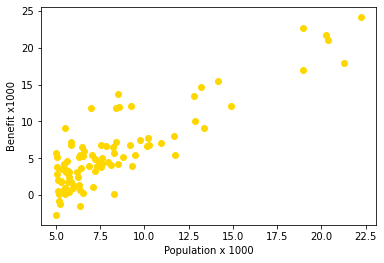

In [149]:
# Lets vizualise our data with a scatter plot

plt.scatter(X[:,1], y, color = 'gold', marker='o')
plt.xlabel('Population x 1000')
plt.ylabel('Benefit x1000')

We can clearly see that there may be a line passing through some these points.

In our first part of the work, we're going to find the parameters $(\theta_{0},\theta_{1})$ because the equation of the line is in the form of $y=\theta_{0} + \theta_{1}x$.

But how do we choose these values at the first iteration ? 
Generally, they are randomly generated or set to zero.


# Gradient Descent : Preparing functions

## The Mean Square Error

**The mean Square Error is also called a loss function.**

The linear regression models we'll examine here use a loss function called squared loss (also known as $L_2$ loss). The squared loss for a single example is as follows:

```
cost  = the square of the difference between the label and the prediction
cost  = (observation - prediction(x))²
cost  = (y - y')²
```

Mean square error (MSE) is the average squared loss per example over the whole dataset. 

To calculate MSE, sum up all the squared losses for individual examples and then divide by the number of examples:

$$MSE = \frac{1}N \sum_{(x,y) \in D}(y - prediction(x))^2$$

Where :

- $(x,y)$ :
  - $x$ being set of features that the model used for predictions, 
  - $y$ is the example's label.
  
  
- $N$ : number of examples in dataset D

Although MSE is commonly-used in machine learning, it is neither the only practical loss function nor the best loss function for all circumstances.

## Reducing Loss

To train a model, we need a good way to reduce the model’s loss. An iterative approach is one widely used method for reducing loss, and is as easy and efficient as walking down a hill.

<center><img src="https://developers.google.com/machine-learning/crash-course/images/GradientDescentDiagram.svg" width=500></center>

In order to get $\theta$ such as $h_{\theta}(X) \approx y$, we need to get the smallest MSE value, which is equivalent to finding the minimum of the loss function.

<p id="loss">We can define that loss function as : </p>

$$ J(\theta) =  \frac{1}{2m} \sum_{i=0}^m(h_{\theta}(X^{(i)}) - y^{(i)}) ^2$$

$\theta$ is a $n$-dimension vector; the loss function is also going to be a $n$-dimension one.

*The loss function can also be called cost function.*


Reducing Loss is made using the **Gradient Descent** algorithm.

In [150]:
# Now that you know what is MSE, lets code it !

def mean_squared_error(y,h_theta):
    y = np.array(y)
    h_theta = np.array(h_theta)
    differences = np.subtract(h_theta, y)
    squared_differences = np.square(differences)
    return squared_differences.mean()

In [151]:
# Since you coded the MSE, you can now do the same with J(theta)

def Cost(X, y, theta):

    # reshape is needed to make sure h and y are substracted element-wise   
    y = y.reshape(-1,1)  
    

    # Calculate h = X * theta 
    h = X.dot(theta)
    
    # Calculate the Cost J
    n=len(y)
    J=np.sum((h-y)**2)/(2*n)
    return J


## Gradient Descent

Gradient Descent Algorithm iteratively calculates the next point using gradient at the current position, then scales it (by a learning rate) and subtracts obtained value from the current position (makes a step).

It subtracts the value because we want to minimise the function (to maximise it would be adding). 
 
In our case,the function we would like to minimize and very frequently is the <a href="#loss">loss function</a>.
This process can be written as:

$$ \theta_{j} := \theta_{j} - \alpha\dfrac{\partial}{\partial \theta}J(\theta) $$


$$0 \leq j\leq n $$ 

 There’s an important parameter $\alpha$ which scales the gradient and thus controls the step size. 

In machine learning, it is called **learning rate** and have a strong influence on performance.

- The smaller learning rate the longer GD converges, or may reach maximum iteration before reaching the optimum point

- If learning rate is too big the algorithm may not converge to the optimal point (jump around) or even to diverge completely.

For a more intuitive notation, we can rewrite the hypothesis equation such as : 

$$
h_{\theta}(X) = \beta + \theta X  \tag{1}
$$

- $\beta$ being the bias (the y-intercept), sometimes referred to as $\theta_{0}$ 
- $\theta$ being the weight,
- $X$ the vector of features (from 1 to $n$)

In [152]:
# Using numpy, code the prediction function

def h_theta(X,theta):
  
  return X.dot(theta)
  

In [153]:
def grad(X,y,theta):
  m=len(y)
  return 1/m *X.T.dot(h_theta(X,theta)-y)

In [154]:
# Now that you ve seen and code the functions (h, J), you can code the GD algorithm
def gradientDescent(X, y, theta, alpha, iterations):

  #Variables that we gonna need
  costs =  np.zeros(iterations)
  theta0 = np.zeros(iterations)
  theta1 = np.zeros(iterations)

  
  m = len(X)
  
  # The loop
  for i in range(iterations):

    theta0[i] = theta[0]
    theta1[i] = theta[1]
  

    # Step 1 : Compute the cost to keep history of it
    y = y.reshape(-1,1) 
    cost=Cost(X,y,theta)
    costs[i]=cost

    # Step 2 : Calculate h = X * theta
    hypothesis=h_theta(X,theta)
   
     
    # Step 3 : Update theta
    theta[0] -= alpha*(sum(hypothesis-y)/m)
    theta[1] -= (alpha * np.sum((hypothesis - y) * X))/m

  return (costs, theta0, theta1)



# Gradient Descent : Calling the functions

In [155]:
# Initialize theta and calculate the first h(theta)
theta = np.array([[0.],[0.]])
h_init = h_theta(X,theta)
h_init

array([[0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],
       [0.],

In [156]:
# Calculate the first cost, and say what do you notice
Cost(X,y,theta)

30.79495785534583

In [157]:
# Parameters
iterations = 1500;
alpha = 0.01;
# Call the gradient descent function
costs, theta0, theta1 = gradientDescent(X, y, theta, alpha, iterations)

gradientDescent(X, y, theta, alpha, iterations)

(array([3.47165562, 3.47161598, 3.47157646, ..., 3.45966974, 3.45966946,
        3.45966917]),
 array([-3.8480519 , -3.84864906, -3.84924524, ..., -4.18050306,
        -4.18055399, -4.18060485]),
 array([1.17642093, 1.17648193, 1.17654283, ..., 1.21038053, 1.21038574,
        1.21039093]))

In [171]:
# Now that we trained our algorithmm, lets see if it's good enough with the r2 function
from sklearn.metrics import r2_score
theta=np.array([theta0[-1],theta1[-1]])

y_pred = h_theta(X,theta)
r2_score(y,y_pred)


0.759820303529447

## Lets plot !

Let's define as well a function to predict $Y$ (or $\hat{y} = h_{\theta}(X)$).

As a reminder, $\theta^T  x$ is equivalent to $X  \theta $ where $X= \begin{pmatrix}
..(x^{(1)})^T..\\
..(x^{(2)})^T..\\
.\\
.\\
.\\
..(x^{(m)})^T..
\end{pmatrix} $

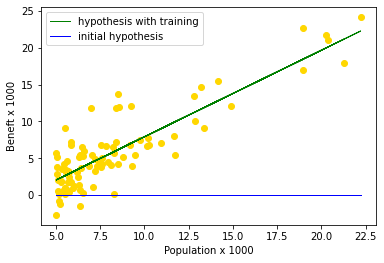

In [159]:
# Plot linear line

plt.scatter(X[:,[1]], y,marker="o", color= 'gold')
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="hypothesis with training")
plt.plot(X[:,[1]], h_init, color='blue', linewidth=1,label="initial hypothesis")
plt.xlabel('Population x 1000')
plt.ylabel('Beneft x 1000')
plt.legend()

In [160]:
# Ploting the cost/iterations
 
def plot_cost_iterations(theta0, theta1, costs):
  plt.plot(costs, color='blue', linewidth=1)
  plt.title('Cost function')
  plt.xlabel("Iterations")
  plt.ylabel("MSE")

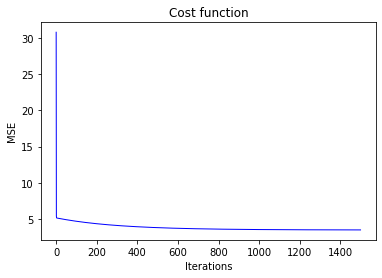

In [161]:
plot_cost_iterations(theta0, theta1, costs)

Text(0.5, 0, 'J')

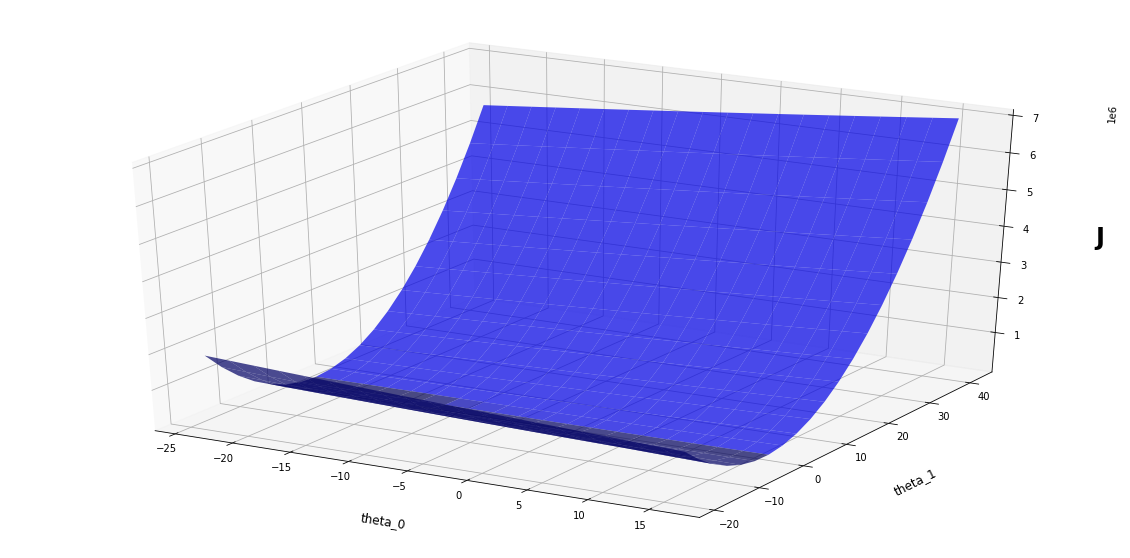

In [162]:
# Plot the cost function, J(theta) in 3D


from mpl_toolkits.mplot3d import Axes3D
ms = np.linspace(theta[0] - 20 , theta[0] + 20, 20)
bs = np.linspace(theta[1] - 20 , theta[1] + 40, 20)

M, B = np.meshgrid(ms, bs)

zs = np.array([Cost(X, y, theta) 
               for theta in zip(np.ravel(M), np.ravel(B))])
Z = zs.reshape(M.shape)

fig = plt.figure(figsize=(20, 10))
ax = fig.add_subplot(111, projection='3d')

ax.plot_surface(M, B, Z, rstride=1, cstride=1, color='b', alpha=0.7)
ax.set_xlabel('theta_0', labelpad=30, fontsize=12)
ax.set_ylabel('theta_1', labelpad=30, fontsize=12)
ax.set_zlabel('J', labelpad=30, fontsize=24, fontweight='bold')

In [163]:
#Plot the cost J(theta) in 2d

def plot_costs_theta(costs, thetha0, theta1):

  fig = plt.figure()
  ax = fig.gca(projection='3d')
  z = costs
  x = theta0
  y = theta1
  ax.plot(x, y, z, label='J (theta)')
  ax.legend()

plt.show()

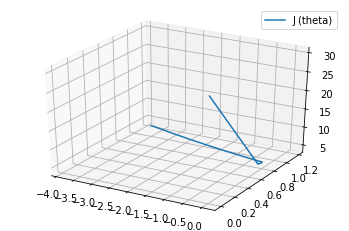

In [164]:
plot_costs_theta(costs, theta0, theta1)

# Lets compare with Sklearn


In [169]:
# Lets redo this with sklearn

#Import the necessary
from sklearn.linear_model import LinearRegression

# Create/instantiate the linear reg
reg =LinearRegression()

# Train our model
reg.fit(X, y)
y_pred = reg.predict(X)

# Check the theta/coef
print(reg.coef_)



[0.         1.21354725]


In [170]:
# Check the r2 score, and compare it with the first one
r2_score(y,y_pred)


0.7606583419339846

In [172]:
# Predict the X with this model and store it in y_pred_skl
y_pred_skl = reg.predict(X)

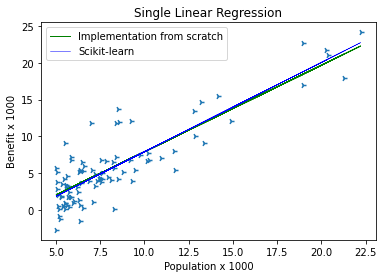

In [173]:
# Ploting our line/sklearn line to compare

plt.scatter(X[:,[1]], y,marker="4")
plt.plot(X[:,[1]], y_pred, color='green', linewidth=1,label="Implementation from scratch")
plt.plot(X[:,[1]], y_pred_skl, color='blue', linewidth=0.5,label="Scikit-learn")
plt.title('Single Linear Regression')
plt.xlabel('Population x 1000')
plt.ylabel('Benefit x 1000')
plt.legend()